In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
data = pd.read_csv('marketing_customer_analysis.csv')

In [3]:
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
num_x = data._get_numeric_data()

In [5]:
num_x.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


In [6]:
#X-Y SPLIT
X = num_x.drop(['Total Claim Amount'], axis=1)
Y = num_x['Total Claim Amount']

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.4,random_state=100)

In [9]:
len(X)

9134

In [10]:
len(x_test)

3654

In [11]:
import statsmodels.api as sm

In [12]:
model = sm.OLS(y_train,x_train).fit()

In [13]:
predictions = model.predict(x_test)

In [14]:
from sklearn.metrics import r2_score

In [15]:
r2_score(y_test,predictions)

0.48288009054567316

In [16]:
#NORMALIZE X all numericals?

In [17]:
from sklearn.preprocessing import OneHotEncoder

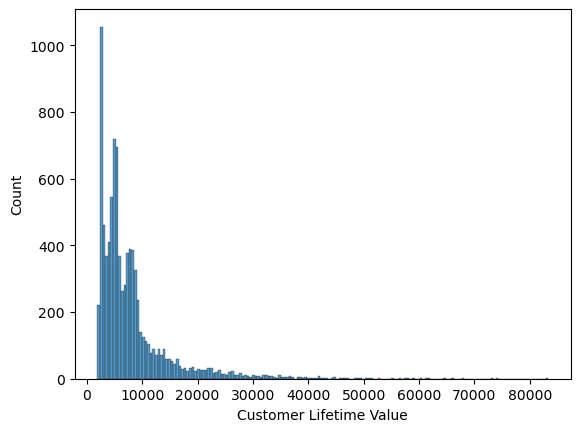

In [18]:
sns.histplot(data['Customer Lifetime Value'])
plt.show()

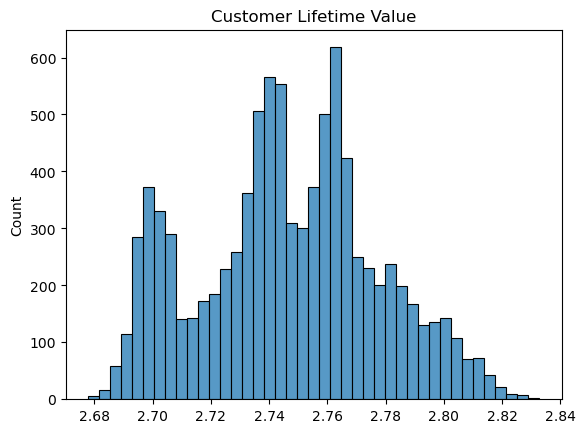

In [19]:
num_x['Customer Lifetime Value'] = num_x['Customer Lifetime Value'].replace(0,num_x['Customer Lifetime Value'].mean())
arr, lmbda = stats.boxcox(num_x['Customer Lifetime Value'])
arr
sns.histplot(arr)
plt.title('Customer Lifetime Value')
plt.show()

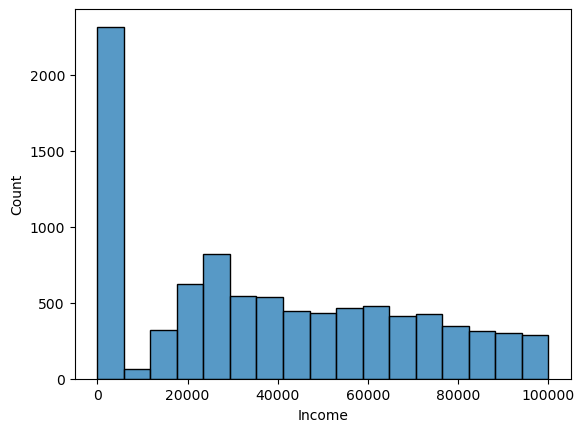

In [20]:
sns.histplot(data['Income'])
plt.show()

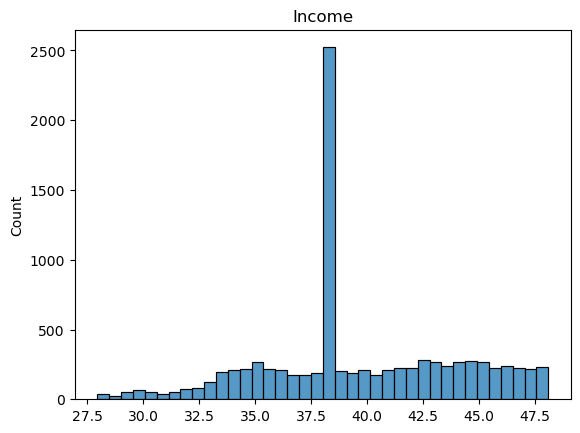

In [21]:
num_x['Income'] = num_x['Income'].replace(0,num_x['Income'].mean())
arr, lmbda = stats.boxcox(num_x['Income'])
arr
sns.histplot(arr)
plt.title('Income')
plt.show()

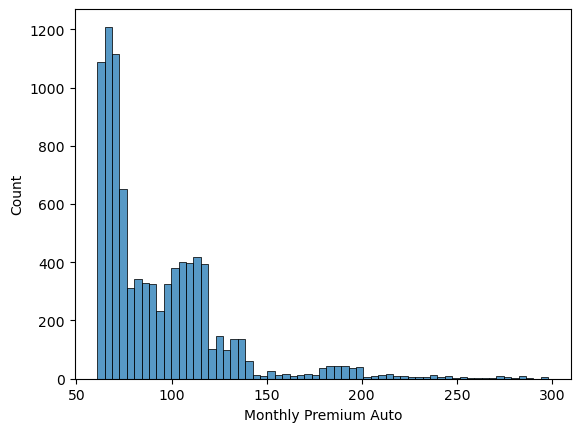

In [22]:
sns.histplot(data['Monthly Premium Auto'])
plt.show()

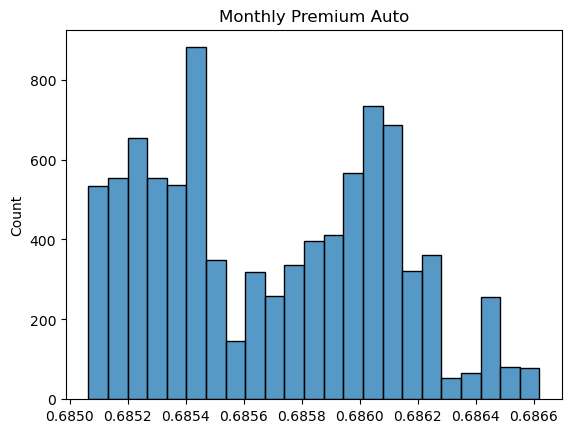

In [23]:
num_x['Monthly Premium Auto'] = num_x['Monthly Premium Auto'].replace(0,num_x['Monthly Premium Auto'].mean())
arr, lmbda = stats.boxcox(num_x['Monthly Premium Auto'])
arr
sns.histplot(arr)
plt.title('Monthly Premium Auto')
plt.show()

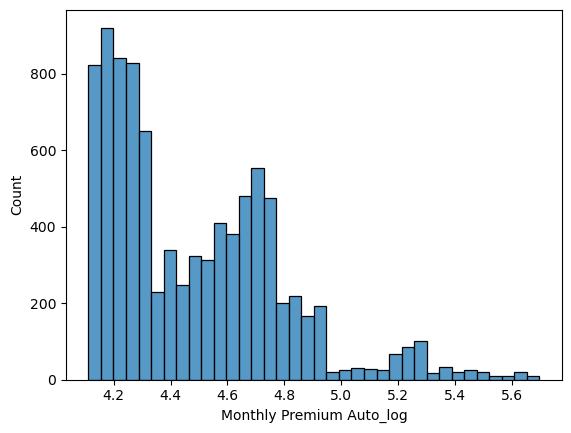

In [24]:
data['Monthly Premium Auto_log'] = np.log(data['Monthly Premium Auto'])
sns.histplot(data['Monthly Premium Auto_log'])
plt.show()

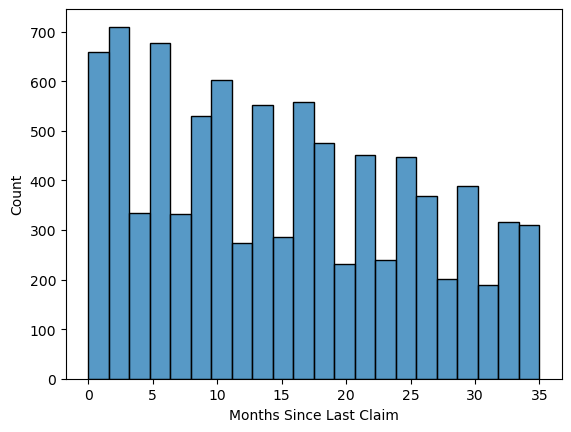

In [25]:
sns.histplot(data['Months Since Last Claim'])
plt.show()

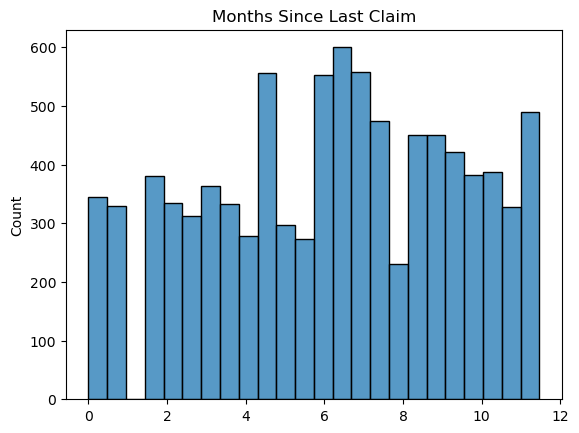

In [26]:
num_x['Months Since Last Claim'] = num_x['Months Since Last Claim'].replace(0,num_x['Months Since Last Claim'].mean())
arr, lmbda = stats.boxcox(num_x['Months Since Last Claim'])
arr
sns.histplot(arr)
plt.title('Months Since Last Claim')
plt.show()

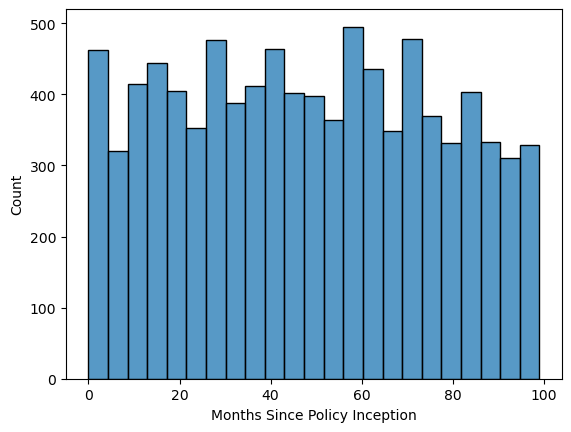

In [27]:
sns.histplot(data['Months Since Policy Inception'])
plt.show()

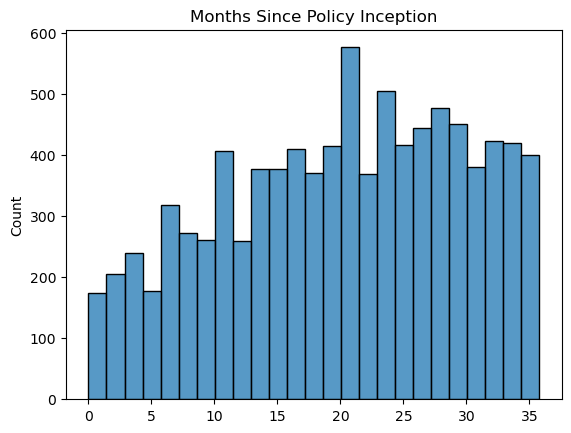

In [28]:
num_x['Months Since Policy Inception'] = num_x['Months Since Policy Inception'].replace(0,num_x['Months Since Policy Inception'].mean())
arr, lmbda = stats.boxcox(num_x['Months Since Policy Inception'])
arr
sns.histplot(arr)
plt.title('Months Since Policy Inception')
plt.show()

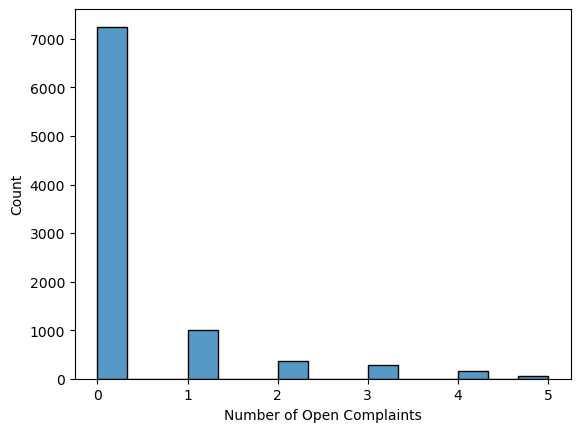

In [29]:
sns.histplot(data['Number of Open Complaints'])
plt.show()

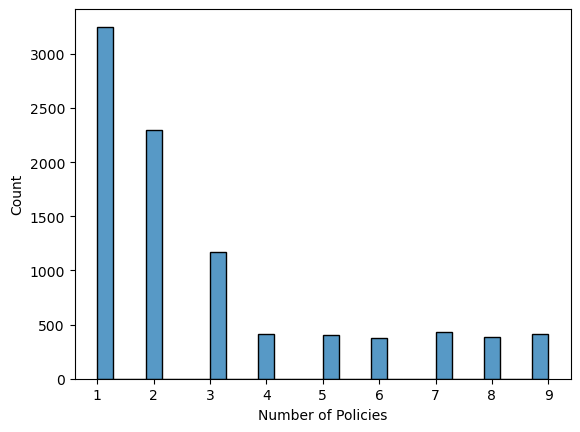

In [30]:
sns.histplot(data['Number of Policies'])
plt.show()

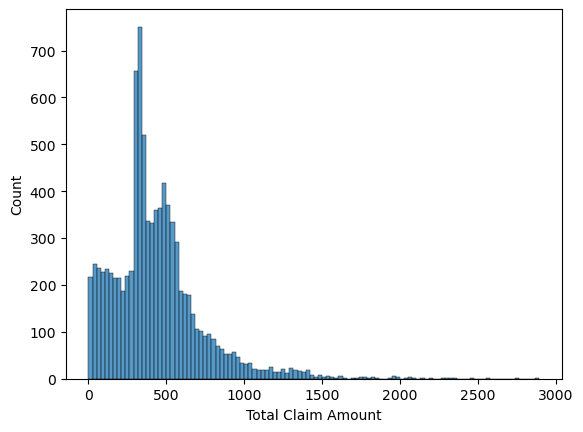

In [31]:
sns.histplot(data['Total Claim Amount'])
plt.show()

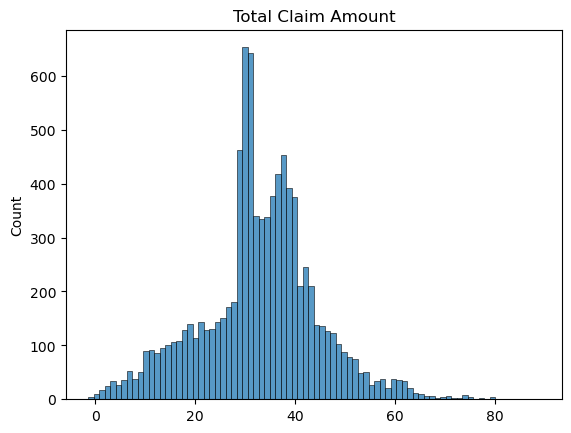

In [32]:
num_x['Total Claim Amount'] = num_x['Total Claim Amount'].replace(0,num_x['Total Claim Amount'].mean())
arr, lmbda = stats.boxcox(num_x['Total Claim Amount'])
arr
sns.histplot(arr)
plt.title('Total Claim Amount')
plt.show()

In [33]:
categoricals = data.select_dtypes('object')

In [34]:
categoricals.head()

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [35]:
categoricals = categoricals.drop(['Customer', 'Effective To Date'], axis=1)

In [37]:
categoricals.head()

,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [38]:
#One Hot/Label Encoding (categorical)
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [39]:
for col in categoricals.columns:
    categoricals[col]=LabelEncoder().fit(categoricals[col]).transform(categoricals[col])

In [40]:
categoricals
#the categoricals are transformed to numericals

,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,4,0,0,0,1,0,1,1,0,2,0,0,5,1
1,0,0,1,0,4,0,1,2,1,5,2,0,0,1
2,2,0,2,0,1,0,1,1,1,5,0,0,5,1
3,1,0,0,0,4,1,1,1,0,1,0,2,3,1
4,4,0,0,0,1,1,0,2,1,3,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,1,0,0,0,1,1,2,1,1,3,1,3,0,1
9130,1,1,1,1,1,0,1,0,0,2,0,1,0,1
9131,1,0,1,0,4,1,1,2,0,1,0,1,0,1
9132,1,0,1,1,1,1,1,1,1,4,2,1,0,0


In [41]:
XX = pd.DataFrame(np.concatenate((num_x, categoricals), axis=1))

In [42]:
XX

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,2763.519279,56274.000000,69.0,32.0,5.0,0.0,1.0,384.811147,4.0,0.0,...,1.0,0.0,1.0,1.0,0.0,2.0,0.0,0.0,5.0,1.0
1,6979.535903,37657.380009,94.0,13.0,42.0,0.0,8.0,1131.464935,0.0,0.0,...,4.0,0.0,1.0,2.0,1.0,5.0,2.0,0.0,0.0,1.0
2,12887.431650,48767.000000,108.0,18.0,38.0,0.0,2.0,566.472247,2.0,0.0,...,1.0,0.0,1.0,1.0,1.0,5.0,0.0,0.0,5.0,1.0
3,7645.861827,37657.380009,106.0,18.0,65.0,0.0,7.0,529.881344,1.0,0.0,...,4.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,1.0
4,2813.692575,43836.000000,73.0,12.0,44.0,0.0,1.0,138.130879,4.0,0.0,...,1.0,1.0,0.0,2.0,1.0,3.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,23405.987980,71941.000000,73.0,18.0,89.0,0.0,2.0,198.234764,1.0,0.0,...,1.0,1.0,2.0,1.0,1.0,3.0,1.0,3.0,0.0,1.0
9130,3096.511217,21604.000000,79.0,14.0,28.0,0.0,1.0,379.200000,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,0.0,1.0
9131,8163.890428,37657.380009,85.0,9.0,37.0,3.0,2.0,790.784983,1.0,0.0,...,4.0,1.0,1.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0
9132,7524.442436,21941.000000,96.0,34.0,3.0,0.0,3.0,691.200000,1.0,0.0,...,1.0,1.0,1.0,1.0,1.0,4.0,2.0,1.0,0.0,0.0


In [43]:
X2 = categoricals.drop(['Vehicle Class'], axis=1)
Y2 = categoricals['Vehicle Class']

In [44]:
x2_train, x2_test, y2_train, y2_test = train_test_split(X2,Y2,test_size=0.4,random_state=100)

In [45]:
model2 = sm.OLS(y2_train,x2_train).fit()

In [46]:
model2

In [47]:
predictions2 = model2.predict(x2_test)

In [50]:
r2_score(y2_test,predictions2)

-0.03500285494196831

In [51]:
from sklearn.metrics import mean_squared_error

In [52]:
mse = mean_squared_error(y2_test, predictions2)
print(mse)

4.474045774395646


In [53]:
import math

In [54]:
rmse = math.sqrt(mse)
print(rmse)

2.1151940276002215


In [56]:
from sklearn.metrics import mean_absolute_error

In [58]:
mae = mean_absolute_error(y2_test,predictions2)
print (mae)

1.9501981370570691
